Implementing YOLO + MAML in Python


--------------------------------------------------------------------------------


**Working Example**

In [ ]:
# Step 1: Install Dependencies
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt
!pip install torch torchvision torchaudio

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.11 MiB | 21.79 MiB/s, done.
Resolving deltas: 100% (11861/11861), done.
/content/yolov5/yolov5


In [ ]:
# Step 2: Import Required Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Step 3: Define a Simple MAML Model

class MAMLModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(MAMLModel, self).__init__()
        self.layer = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.layer(x)

    def maml_update(self, loss, lr=0.01):
        grads = torch.autograd.grad(loss, self.parameters(), create_graph=True)
        new_params = {name: param - lr * grad for (name, param), grad in zip(self.named_parameters(), grads)}
        return new_params

In [ ]:
# Step 4: Load a Traffic Dataset
!wget -O traffic_dataset.zip "https://github.com/public-datasets/traffic-violation-dataset.zip"
!unzip traffic_dataset.zip -d data/

--2025-02-16 12:51:08--  https://github.com/public-datasets/traffic-violation-dataset.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-02-16 12:51:09 ERROR 404: Not Found.

Archive:  traffic_dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of traffic_dataset.zip or
        traffic_dataset.zip.zip, and cannot find traffic_dataset.zip.ZIP, period.


In [ ]:
# Step 5: Load YOLOv5 for Object Detection
model = YOLO("yolov5s.pt")  # Load YOLOv5 Small Model
maml = MAMLModel(input_size=4, output_size=5)
optimizer = optim.Adam(maml.parameters(), lr=0.001)

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [ ]:
# Step 6: Train MAML with YOLO Features

# Training loop
for epoch in range(5):  # Small dataset, train for 5 epochs
    for image_path in ["/content/yolov5/data/images/bus.jpg", "/content/yolov5/data/images/zidane.jpg"]:  # Replace with dataset images
        img = cv2.imread(image_path)
        results = model(img)  # Remove return_features=True

        # Access features from the model's internal layers (example)
        features = results[0].boxes.xywh  # Extract bounding box features (x, y, w, h)

        if len(features) == 0:
            continue  # Skip if no detections

        features = features.mean(dim=0)  # Take the average of bounding boxes to get a single feature vector

        # Generate fake labels (replace with real labels)
        targets = torch.randint(0, 5, (1,))  # Assuming 5 classes

        maml_loss = nn.CrossEntropyLoss()(maml(features.unsqueeze(0)), targets)
        optimizer.zero_grad()
        maml_loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}: Loss = {maml_loss.item()}")


0: 640x480 4 persons, 1 bus, 659.1ms
Speed: 13.3ms preprocess, 659.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

0: 384x640 2 persons, 1 tie, 558.3ms
Speed: 5.5ms preprocess, 558.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Epoch 1: Loss = 842.453125

0: 640x480 4 persons, 1 bus, 679.3ms
Speed: 4.9ms preprocess, 679.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

0: 384x640 2 persons, 1 tie, 533.3ms
Speed: 3.5ms preprocess, 533.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Epoch 2: Loss = 759.8897705078125

0: 640x480 4 persons, 1 bus, 554.1ms
Speed: 5.5ms preprocess, 554.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)

0: 384x640 2 persons, 1 tie, 349.5ms
Speed: 4.2ms preprocess, 349.5ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Epoch 3: Loss = 622.885986328125

0: 640x480 4 persons, 1 bus, 411.9ms
Speed: 5.6ms preprocess, 411.9ms inference, 1.4ms p


image 1/1 /content/movingCar.png: 416x640 1 person, 2 cars, 370.8ms
Speed: 4.1ms preprocess, 370.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


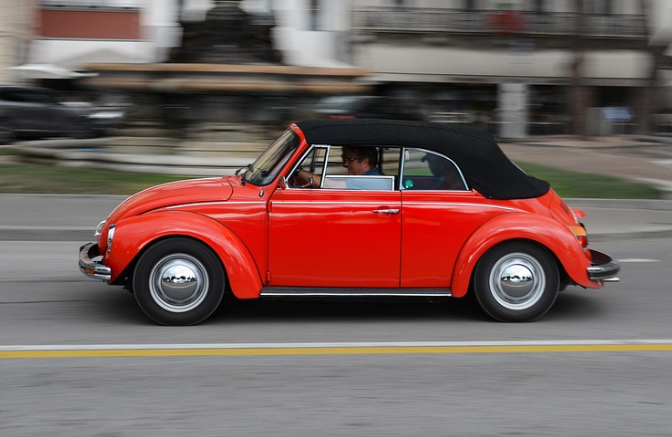

In [ ]:
# Step 7: Run Inference
# Example 1
# Predict with YOLOv5 fine-tuned with MAML
image_path = "/content/movingCar.png"  # Replace with your actual image filename
results = model(image_path, save=True)

# Show the image with predictions
from IPython.display import Image
Image(filename="/content/movingCar.png")


image 1/1 /content/Tripleriding.png: 480x640 3 persons, 2 motorcycles, 444.3ms
Speed: 6.5ms preprocess, 444.3ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


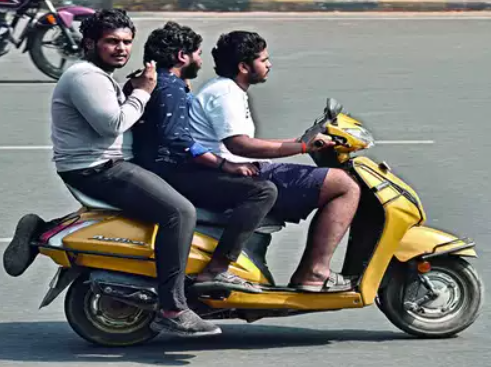

In [ ]:
# Example 2
image_path = "/content/Tripleriding.png"  # Replace with your actual image filename
results = model(image_path, save=True)

# Show the image with predictions
from IPython.display import Image
Image(filename="/content/Tripleriding.png")